In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

# Lecture 05 - JSON, XML and HTML
by Vítek Macháček <br>
March 20-21

### May 9th - Operator ICT - Benedikt Kotmel


### Table of contents

* Standardized data representation
* JSON
* XML
* Introduction to BeautifulSoup
* Basics of HTML (+ Element Inspection)
* Introduction to Requests (GET vs. POST) and APIs


## Structured data
* only data. It does not do anything!
* More general than tables
* distributed as text/string
* text files or APIs.

### Communication 
* Server -> client
* Server -> Server
* Application -> Application

* Only transferring of data
* Both sides need to understand the structure

### Storing
* self-descriptive
* human readable


### Standardization
* predictability
* cooperation
* spillovers from standardization

## JSON
* JavaScript Object Notation
* often *.json* files
* but also used in the web etc.
* supports standard datatypes - strings, integers, floats, lists

In [3]:
teachers = [{'name':'Jozef Baruník','titles':['doc.','PhDr.','Ph.D.','Bc.','Mgr.'],'ID':1234,'courses':['JEM005','JEM116','JEM059','JEM061']},
            {'name':'Martin Hronec','titles':['Bc.','Mgr.'],'ID':3421,'courses':['JEM005','JEM207']},
            {'name':'Lukáš Vácha','titles':['Bc.','Mgr.','Ph.D.'],'ID':5678,'courses':['JEM059','JEM061']}]
courses = {
    'JEM005':{'name':'Advanced Econometrics','ECTS':6,'teachers':[3421,1234]},
    'JEM207':{'name':'Data Processing in Python','ECTS':5,'teachers':[3421]},
    'JEM116':{'name':'Applied Econometrics','ECTS':6,'teachers':[1234]},
    'JEM059':{'name':'Quantitative Finance I.','ECTS':6,'teachers':[1234,5678]},
    'JEM061':{'name':'Quantitative Finance II.','ECTS':6,'teachers':[1234,5678]}
}
js = {'teachers':teachers,'courses':courses}
type(js)

dict

https://jsonformatter.curiousconcept.com/

In [4]:
import json
print(json.dumps(js,indent=4))

{
    "teachers": [
        {
            "name": "Jozef Barun\u00edk",
            "titles": [
                "doc.",
                "PhDr.",
                "Ph.D.",
                "Bc.",
                "Mgr."
            ],
            "ID": 1234,
            "courses": [
                "JEM005",
                "JEM116",
                "JEM059",
                "JEM061"
            ]
        },
        {
            "name": "Martin Hronec",
            "titles": [
                "Bc.",
                "Mgr."
            ],
            "ID": 3421,
            "courses": [
                "JEM005",
                "JEM207"
            ]
        },
        {
            "name": "Luk\u00e1\u0161 V\u00e1cha",
            "titles": [
                "Bc.",
                "Mgr.",
                "Ph.D."
            ],
            "ID": 5678,
            "courses": [
                "JEM059",
                "JEM061"
            ]
        }
    ],
    "courses": {
        "JEM005":

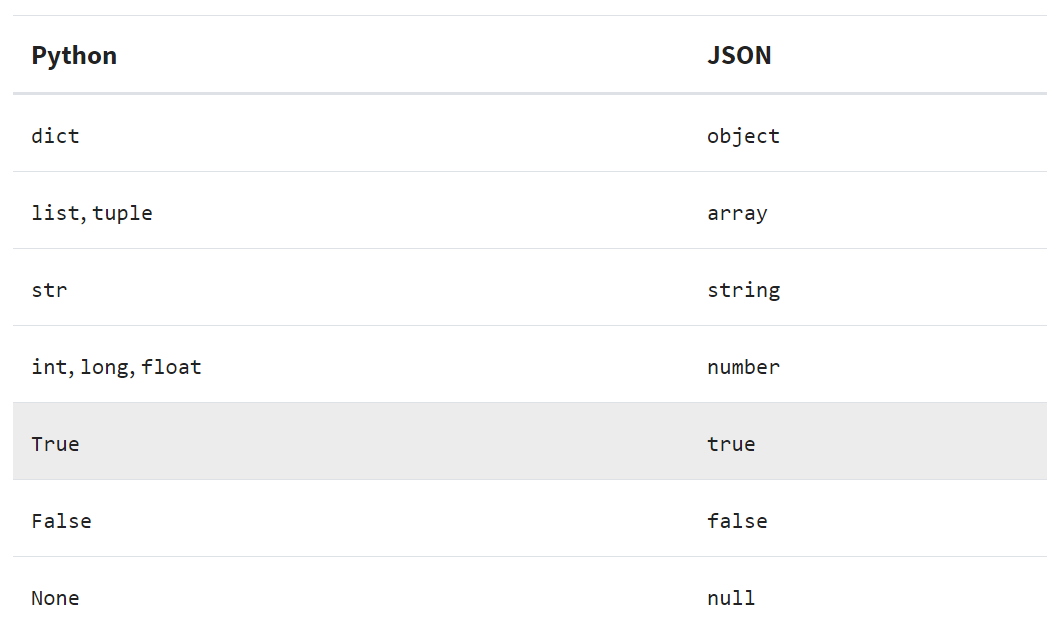

In [7]:
pd.read_json(json.dumps(js['courses']))

,ECTS,name,teachers
JEM005,6,Advanced Econometrics,"[3421, 1234]"
JEM207,5,Data Processing in Python,[3421]
JEM116,6,Applied Econometrics,[1234]
JEM059,6,Quantitative Finance I.,"[1234, 5678]"
JEM061,6,Quantitative Finance II.,"[1234, 5678]"


In [8]:
dfc = pd.read_json(json.dumps(js['courses']),orient='index')
dfc

,ECTS,name,teachers
JEM005,6,Advanced Econometrics,"[3421, 1234]"
JEM207,5,Data Processing in Python,[3421]
JEM116,6,Applied Econometrics,[1234]
JEM059,6,Quantitative Finance I.,"[1234, 5678]"
JEM061,6,Quantitative Finance II.,"[1234, 5678]"


In [9]:
dfc.loc[dfc.teachers.apply(lambda x: 5678 in x)]

,ECTS,name,teachers
JEM059,6,Quantitative Finance I.,"[1234, 5678]"
JEM061,6,Quantitative Finance II.,"[1234, 5678]"


## GeoJSON

* One standardized data format for transferring geodata
* Plenty of geodata out there
* see for example http://opendata.iprpraha.cz/CUR/DTMP/PRAHA_P/WGS_84/PRAHA_P.json

In [10]:
import requests
d = requests.get('http://opendata.iprpraha.cz/CUR/OVZ/OVZ_Klima_ZnecOvzdusi_p/WGS_84/OVZ_Klima_ZnecOvzdusi_p.json').json()

In [19]:
type(d['features'])

list

In [28]:
colorscale(1)

'#ffe187'

In [27]:
import branca
import folium

colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 5)

def style_function(feature):
    gridvalue = feature['properties']['GRIDVALUE']
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': colorscale(gridvalue)
    }

m = folium.Map(location=[50.085,14.45],zoom_start=11)
if True:
    folium.GeoJson('http://opendata.iprpraha.cz/CUR/OVZ/OVZ_Klima_ZnecOvzdusi_p/WGS_84/OVZ_Klima_ZnecOvzdusi_p.json',style_function=style_function).add_to(m)
m

# eXtensible Markup Language (XML)

* elements
* attributes
* tags

### Tag
> <>

### Element

In [29]:
#either
'''<element>content</element>'''

#or no content (self-closing)
'''<element />''';

### Attributes

In [ ]:
'''<element attr="value" />''';

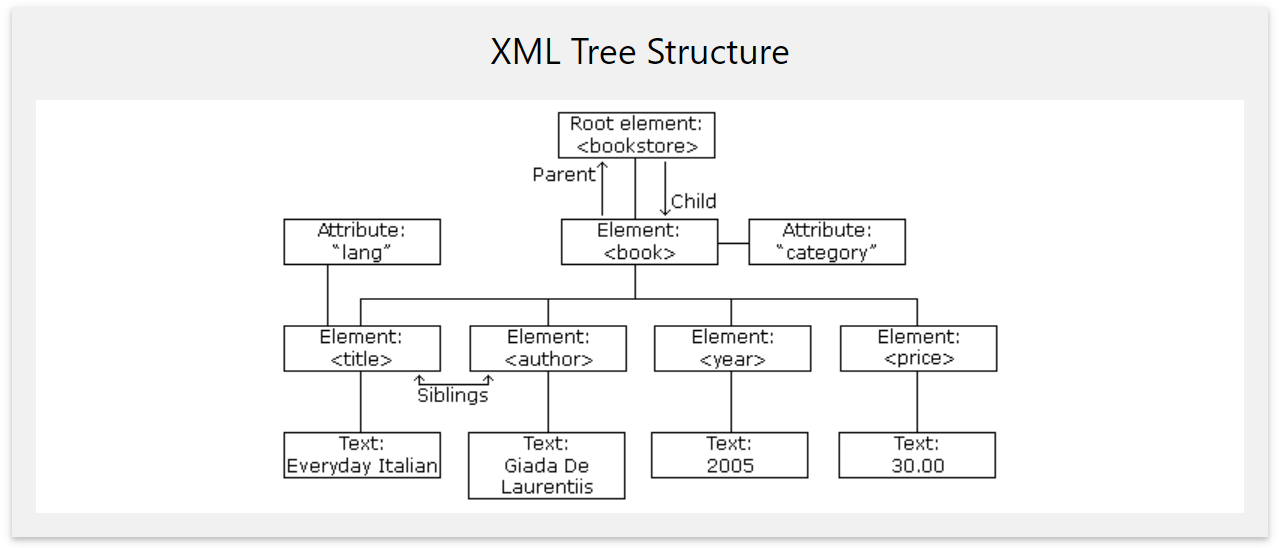


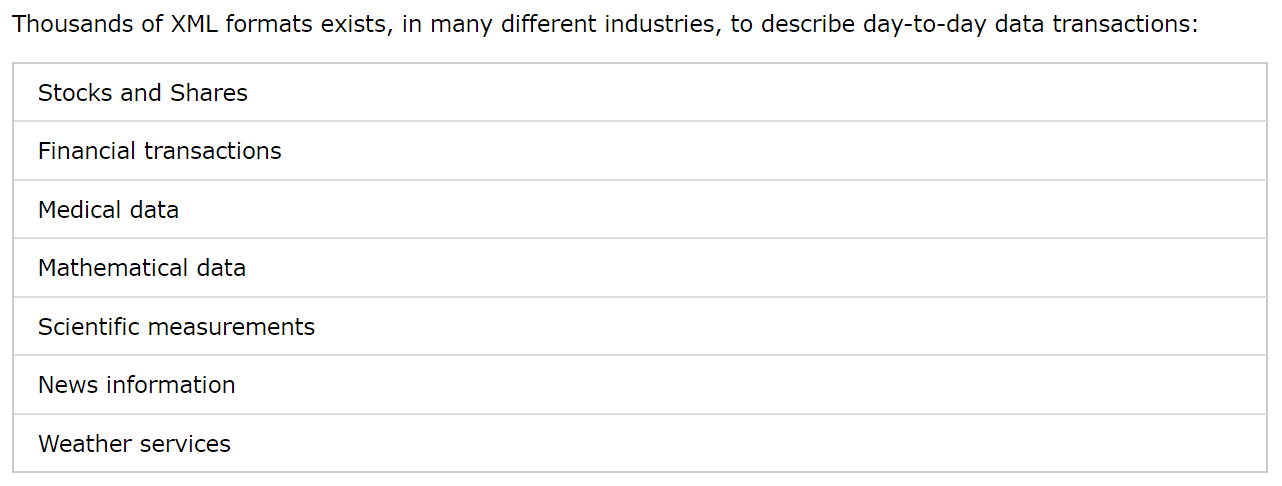

https://www.w3schools.com/xml/xml_rss.asp

## Navigation
* Xpath
* CSS selectors 
* **BeautifulSoup**

### BeatifulSoup in detail
each BS object represents
* an element
* the position in tree

In [30]:
xml = '''
<?xml version="1.0" encoding="utf-8"?>
<courses>
    <course id="JEM005" ects="6" name="Advanced Econometrics">
        <teacher-id>3421</teacher-id>
        <teacher-id>1234</teacher-id>
    </course>
    <course id="JEM207" ects="5" name="Data Processing in Python">
        <teacher-id>3421</teacher-id>
    </course>
        <course id="JEM116" ects="6" name="Applied Econometrics I.">
        <teacher-id>1234</teacher-id>
    </course>
    <course id="JEM059" ects="6" name="Quantitative Finance I.">
        <teacher-id>1234</teacher-id>
        <teacher-id>5678</teacher-id>
    </course>
    <course id="JEM061" ects="6" name="Quantitative Finance II.">
        <teacher-id>1234</teacher-id>
        <teacher-id>5678</teacher-id>
    </course>
</courses>
'''

soup = BeautifulSoup(xml,'lxml')

```find()``` will find a **first** element given the input

In [38]:
course = soup.find('course',{'id':'JEM059'})
course.findAll('teacher-id')

bs4.element.ResultSet

`soup['attr']` will return the value of attribute 

In [40]:
course['ects']

'6'

`.findAll()` finds all children given the input

In [41]:
soup.findAll('teacher-id')

[<teacher-id>3421</teacher-id>,
 <teacher-id>1234</teacher-id>,
 <teacher-id>3421</teacher-id>,
 <teacher-id>1234</teacher-id>,
 <teacher-id>1234</teacher-id>,
 <teacher-id>5678</teacher-id>,
 <teacher-id>1234</teacher-id>,
 <teacher-id>5678</teacher-id>]

In [43]:
course

<course ects="6" id="JEM059" name="Quantitative Finance I.">
<teacher-id>1234</teacher-id>
<teacher-id>5678</teacher-id>
</course>

you can also navigate horizontally

In [42]:
course.findNext('course')

<course ects="6" id="JEM061" name="Quantitative Finance II.">
<teacher-id>1234</teacher-id>
<teacher-id>5678</teacher-id>
</course>

In [44]:
course.findPrevious('course')

<course ects="6" id="JEM116" name="Applied Econometrics I.">
<teacher-id>1234</teacher-id>
</course>

and even upstream!

In [45]:
course.parent

<courses>
<course ects="6" id="JEM005" name="Advanced Econometrics">
<teacher-id>3421</teacher-id>
<teacher-id>1234</teacher-id>
</course>
<course ects="5" id="JEM207" name="Data Processing in Python">
<teacher-id>3421</teacher-id>
</course>
<course ects="6" id="JEM116" name="Applied Econometrics I.">
<teacher-id>1234</teacher-id>
</course>
<course ects="6" id="JEM059" name="Quantitative Finance I.">
<teacher-id>1234</teacher-id>
<teacher-id>5678</teacher-id>
</course>
<course ects="6" id="JEM061" name="Quantitative Finance II.">
<teacher-id>1234</teacher-id>
<teacher-id>5678</teacher-id>
</course>
</courses>

In [48]:
type([int(t.text) for t in course.findAll('teacher-id')])

list

In [50]:
course = soup.find('course')
d = {
    'id':course['id'],
    'name':course['name'],
    'ects':course['ects'],
    'teachers':[int(t.text) for t in course.findAll('teacher-id')]
}
d

{'id': 'JEM005',
 'name': 'Advanced Econometrics',
 'ects': '6',
 'teachers': [3421, 1234]}

In [51]:
l = []
for course in soup.findAll('course'):
    d = {'id':course['id'],
         'name':course['name'],
         'ects':course['ects'],
         'teachers':[int(t.text) for t in course.findAll('teacher-id')]}
    l.append(d)
pd.DataFrame(l)

,ects,id,name,teachers
0,6,JEM005,Advanced Econometrics,"[3421, 1234]"
1,5,JEM207,Data Processing in Python,[3421]
2,6,JEM116,Applied Econometrics I.,[1234]
3,6,JEM059,Quantitative Finance I.,"[1234, 5678]"
4,6,JEM061,Quantitative Finance II.,"[1234, 5678]"


# HTML
standard web-page consists of:

* Client side
    * HTML "DOM" structure - the website content
    * CSS stylesheets - website graphics
    * JavaScripts - website interactivity
* Server side
    * Server, database, etc.

## Web-scraping
* always client side only
* Navigating HTML DOM by taking advantage of CSS structure

## DOM (Document Object Module):


In [53]:
html = '''
<html>
    <head>
        <title>Sample page</title>
        
    <script></script>
    </head>
    
    <body>
        <div id="header">
            My page header
        </div>
        <div id="content">
            <table>
                <tr class="firstRow">
                    <td>name</td>
                    <td>number</td>
                </tr>
                <tr class="normalRow">
                    <td>B</td>
                    <td>2</td>
                </tr>
                <tr class="normalRow">
                    <td>C</td>
                    <td>3</td>
                </tr>
            </table>
        </div>
    </body>
</html>
'''
from IPython.core.display import display, HTML
display(HTML(html))

name,number
B,2
C,3


In [65]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'xml')
[int(row.findAll('td')[1].text) for row in soup.findAll('tr',{'class':'normalRow'})]

[2, 3]

## HTML Inspection
http://ies.fsv.cuni.cz/cs/node/51

# APIs and requests

API = *Application Programming Interface*

we use it in a context of webserver's endpoint - HTTP API

[Example API](http://ec2-18-188-88-0.us-east-2.compute.amazonaws.com:4466/)

### When to use?
* when more applications need to communicate automatically?
* user-friendly interface for complicated tasks - DEEP AI
* Data - scientometrics etc.

### GET request
* fast
* public
* data flow only one direction
* parameters via request adress

> vitekzkytek.cz/index.html?name1=value1&name2=value2

In [67]:
import requests
r = requests.get('https://or.justice.cz/ias/ui/rejstrik-$firma?jenPlatne=PLATNE&nazev=%C5%A0KODA&polozek=50&typHledani=STARTS_WIT')


### POST request
* slow
* private
* both sides can send data



## Static pages x Dynamic pages

### Static
* usually generated from a single GET request
* all information necessary for drawing a website is already in 
* everything happens on client's side
* all parameters within the adress!


### Dynamic content
* webpage communicates with the webserver and the database
* solution -> Selenium!

## How to chose data source for project

You need to know in advance what data you will download:

1. full or satisfactory access to API
2. the web-page is parsable (prefer not too much javascript)
3. plan to generate all requests

# APIs Example
### Get wiki data using GET

In [68]:
import requests
from bs4 import BeautifulSoup
response = requests.get('https://en.wikipedia.org/wiki/Charles_University')
soup = BeautifulSoup(response.text,'lxml')
div = soup.find('div',{'id':'mw-content-text'}) #  #mw-content-text > div > p:nth-child(10)texts)
article = ' '.join([p.text for p in div.find_all('p')])
article

'Charles University, known also as Charles University in Prague (Czech: Univerzita Karlova; Latin: Universitas Carolina; German: Karls-Universität) or historically as the University of Prague (Latin: Universitas Pragensis), is the oldest and largest university in the Czech Republic. Founded in 1348, it was the first university in Central Europe.[3] It is one of the oldest universities in Europe in continuous operation and ranks in the upper 1.5 percent of the world’s best universities.[4][5] Today, the university consists of 17 faculties located in Prague, Hradec Králové and Pilsen. Its academic publishing house is Karolinum Press. The university also operates several museums and two botanical gardens.\n Its seal shows its protector Emperor Charles IV, with his coats of arms as King of the Romans and King of Bohemia, kneeling in front of St. Wenceslas, the patron saint of Bohemia. It is surrounded by the inscription, Sigillum Universitatis Scolarium Studii Pragensis (English: Seal of t

### Ask DeepAI using POST request

In [69]:
%run '/home/vitekzkytek/jupyter/Teaching/PythonDataIES/auth.py'

r = requests.post(
    "https://api.deepai.org/api/summarization",
    data={
        'text': article,
    },
    headers={'api-key': DEEPAI_API_KEY}
)
r.json()['output']

'Charles University, known also as Charles University in Prague (Czech: Univerzita Karlova; Latin: Universitas Carolina; German: Karls-Universität) or historically as the University of Prague (Latin: Universitas Pragensis), is the oldest and largest university in the Czech Republic.\nThe establishment of a medieval university in Prague was inspired by Holy Roman Emperor Charles IV.[7] He asked his friend and ally, Pope Clement VI, to do so.\nOn 26 January 1347 the pope issued the bull establishing a university in Prague, modeled on the University of Paris, with the full (4) number of faculties, that is including theological.\nThe result of this coup was the emigration of foreign (mostly German) professors and students, founding the University of Leipzig in May 1409.\nBefore that, in 1408, the university had about 200 doctors and magisters, 500 bachelors, and 30,000 students; it now lost a large part of this number, accounts of the loss varying from 5000 to 20,000 including 46 professor

# Bonus example:

<img src="http://ies.fsv.cuni.cz/default/file/get/id/31996" height="500" width="300">

In [70]:
img = 'http://ies.fsv.cuni.cz/default/file/get/id/31996'
r = requests.post(
    "https://api.deepai.org/api/demographic-recognition",
    data={
        'image': img,
    },
    headers={'api-key': DEEPAI_API_KEY}
)
r.json()


{'output': {'faces': [{'age_range': [15, 31],
    'cultural_appearance_confidence': 0.52,
    'gender': 'Male',
    'age_range_confidence': 0.61,
    'bounding_box': [336, 483, 659, 659],
    'gender_confidence': 0.94,
    'cultural_appearance': 'White'}]}}

In [71]:
r = requests.post(
    "https://api.deepai.org/api/celebrity-recognition",
    data={
        'image': img,
    },
    headers={'api-key': DEEPAI_API_KEY}
)
r.json()


{'output': {'celebrities': [{'bounding_box': [353, 481, 573, 573],
    'confidence': '0.71',
    'name': 'ash stymest'}]}}

In [72]:
r = requests.post(
    "https://api.deepai.org/api/nsfw-detector",
    data={
        'image': img,
    },
    headers={'api-key': DEEPAI_API_KEY}
)
r.json()


{'output': {'detections': [], 'nsfw_score': 0.001}}